In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('cement_strength.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
df.sample(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
529,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,68.75
421,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,14,34.24
737,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,28,17.54
598,339.0,0.0,0.0,197.0,0.0,968.0,781.0,3,13.22
865,265.0,111.0,86.0,195.0,6.0,833.0,790.0,28,41.54


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [5]:
columns={
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'}

In [6]:
df = df.rename(columns=columns)

In [7]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
372,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,56,37.27
191,233.8,0.0,94.6,197.9,4.6,947.0,852.2,28,22.84
551,255.0,0.0,0.0,192.0,0.0,889.8,945.0,3,8.20
350,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14,33.70
282,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64


***sucessfully renamed the columns named***

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

***so there is no missing value in any column.***

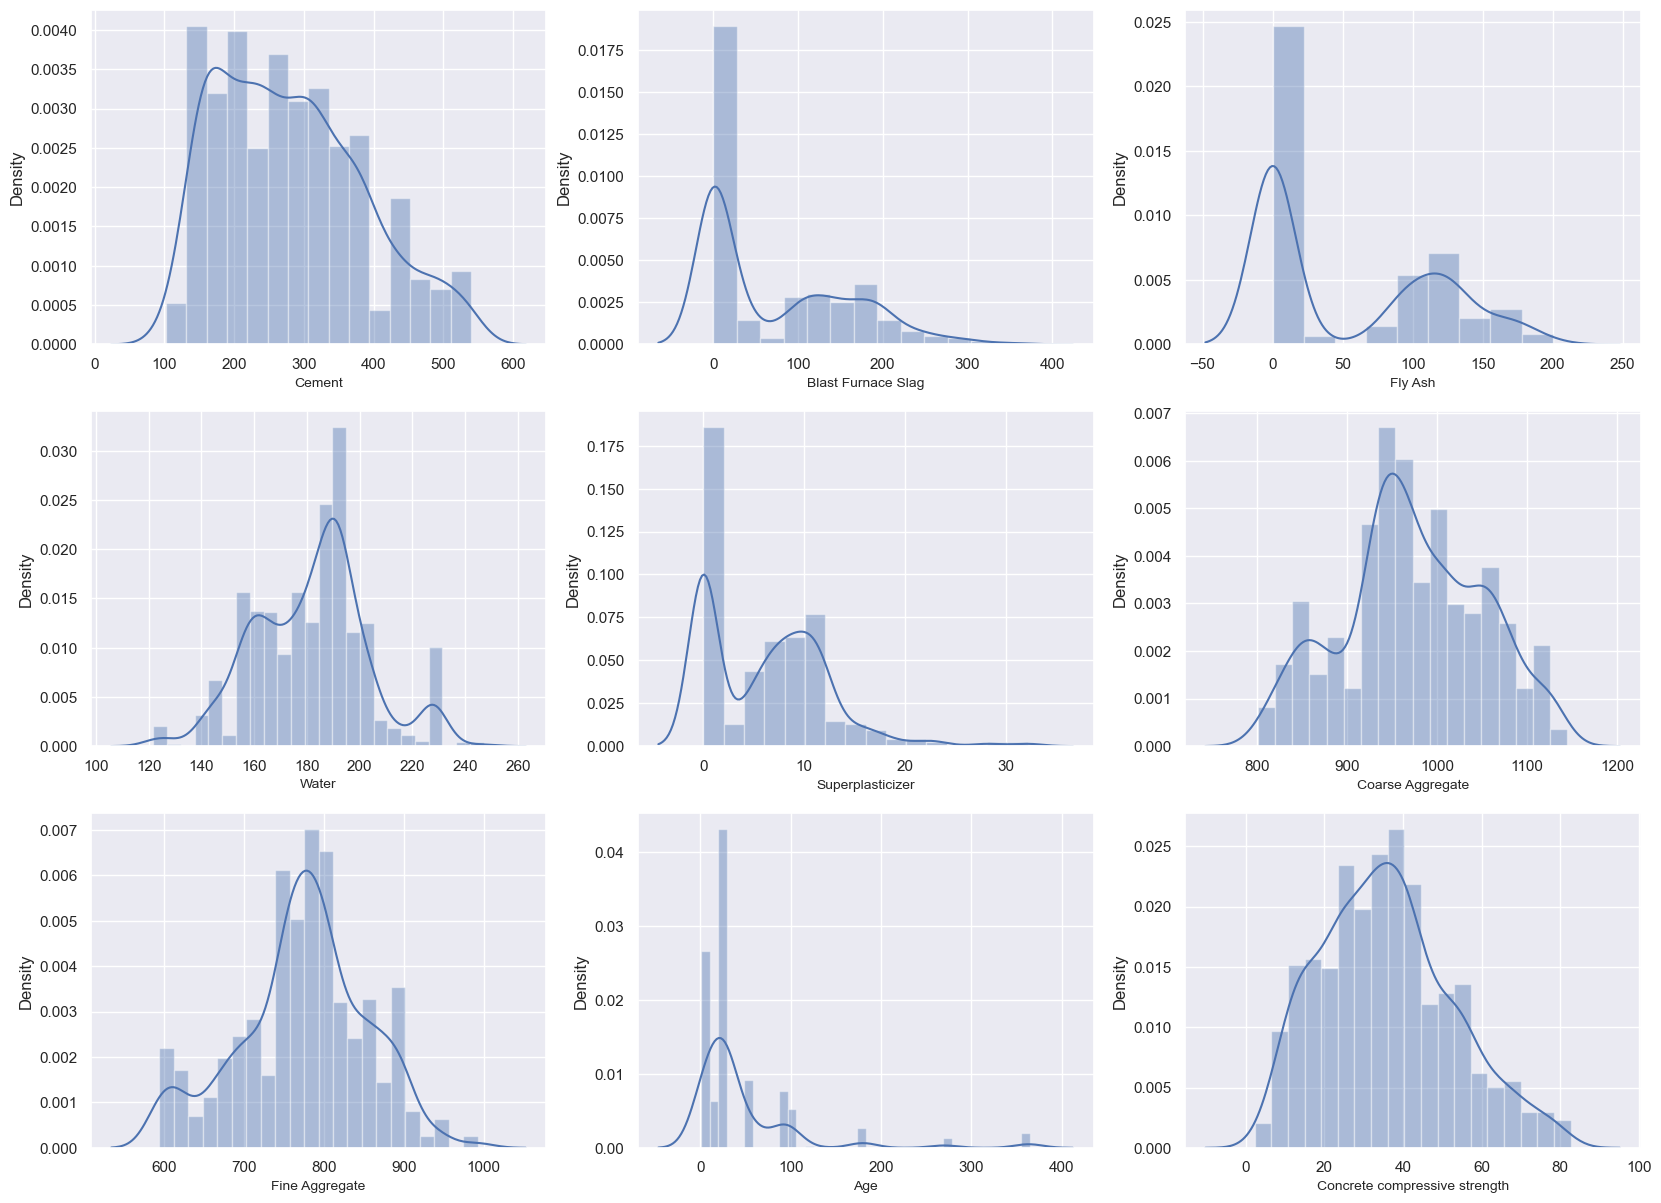

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

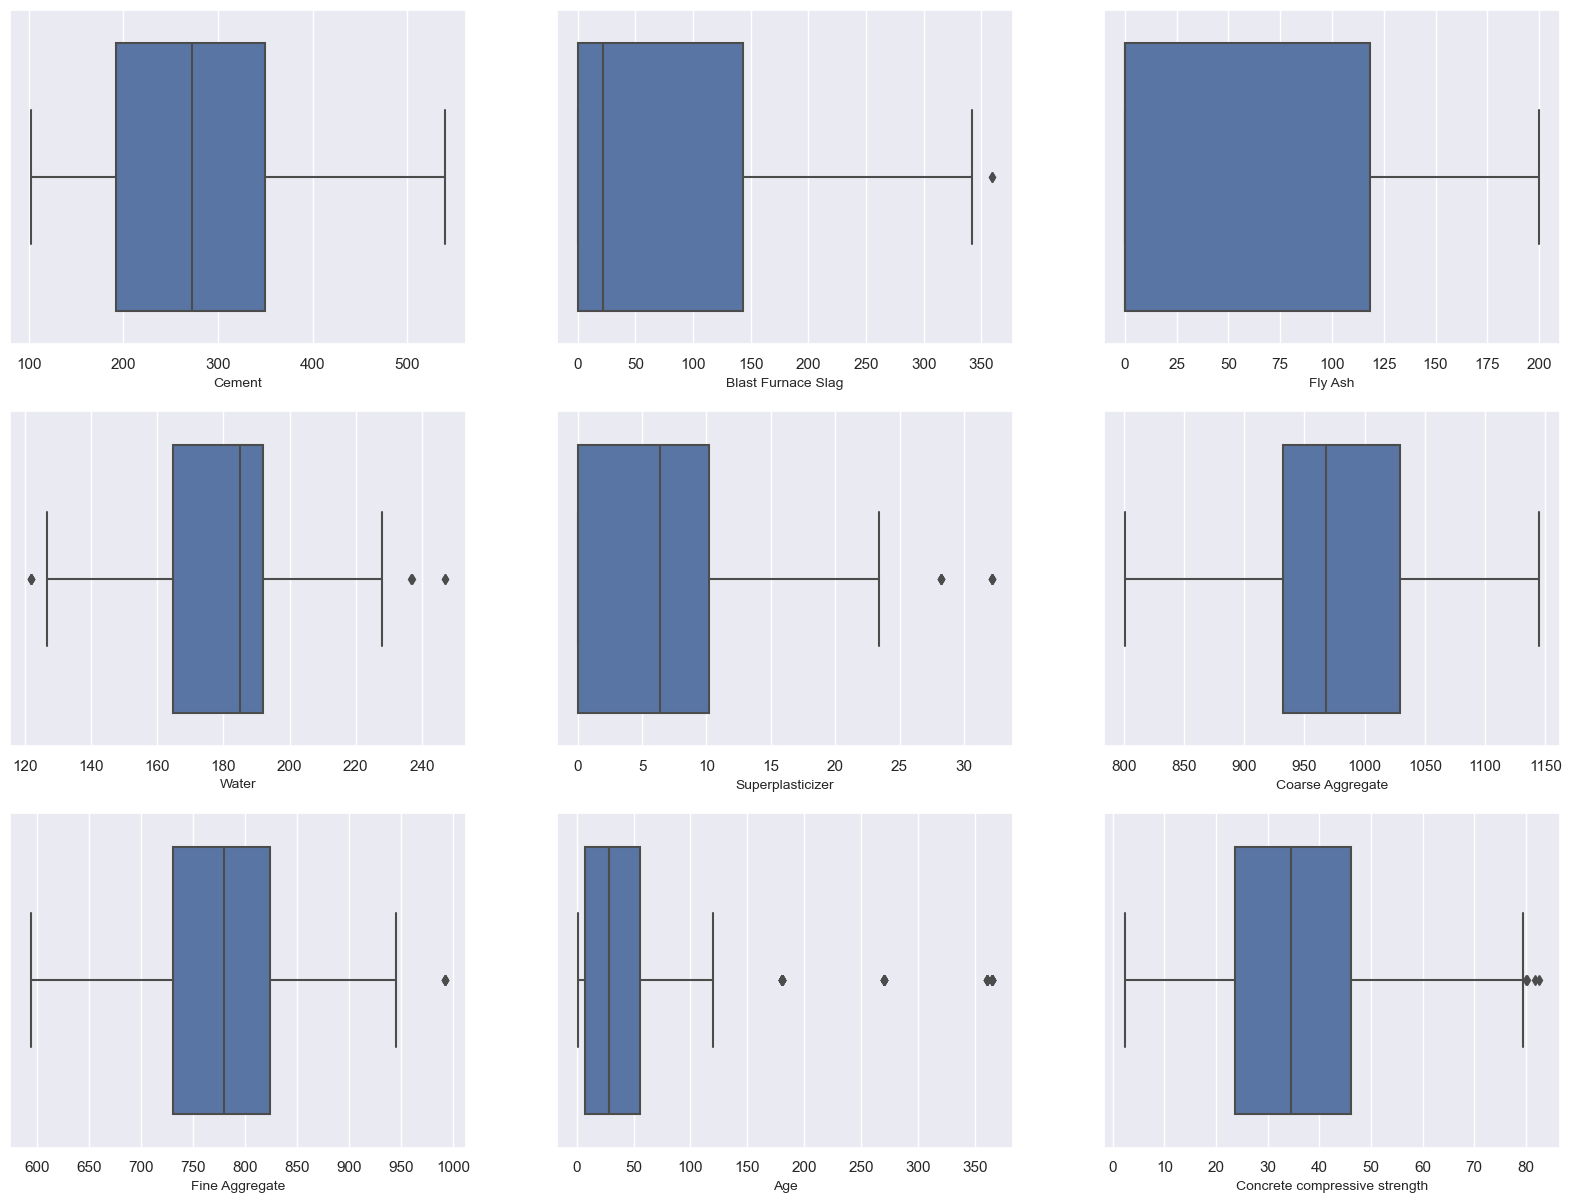

In [11]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# Data Transformation 

In [12]:
X = df.drop('Concrete compressive strength',axis=1)

In [13]:
y = df['Concrete compressive strength']

In [14]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0
for column in X.columns:
    X[column]+=1
    X[column]=np.log(X[column])    

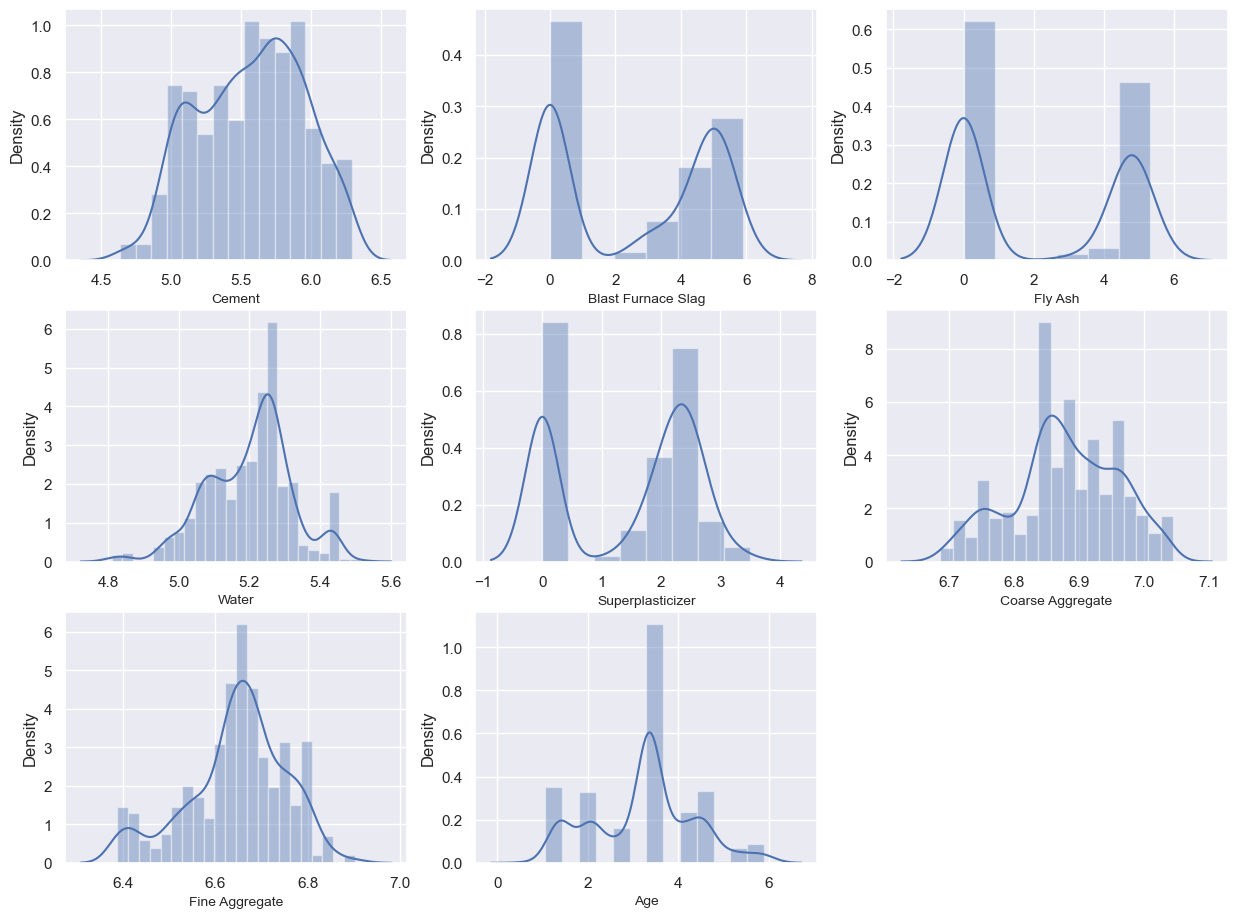

In [15]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

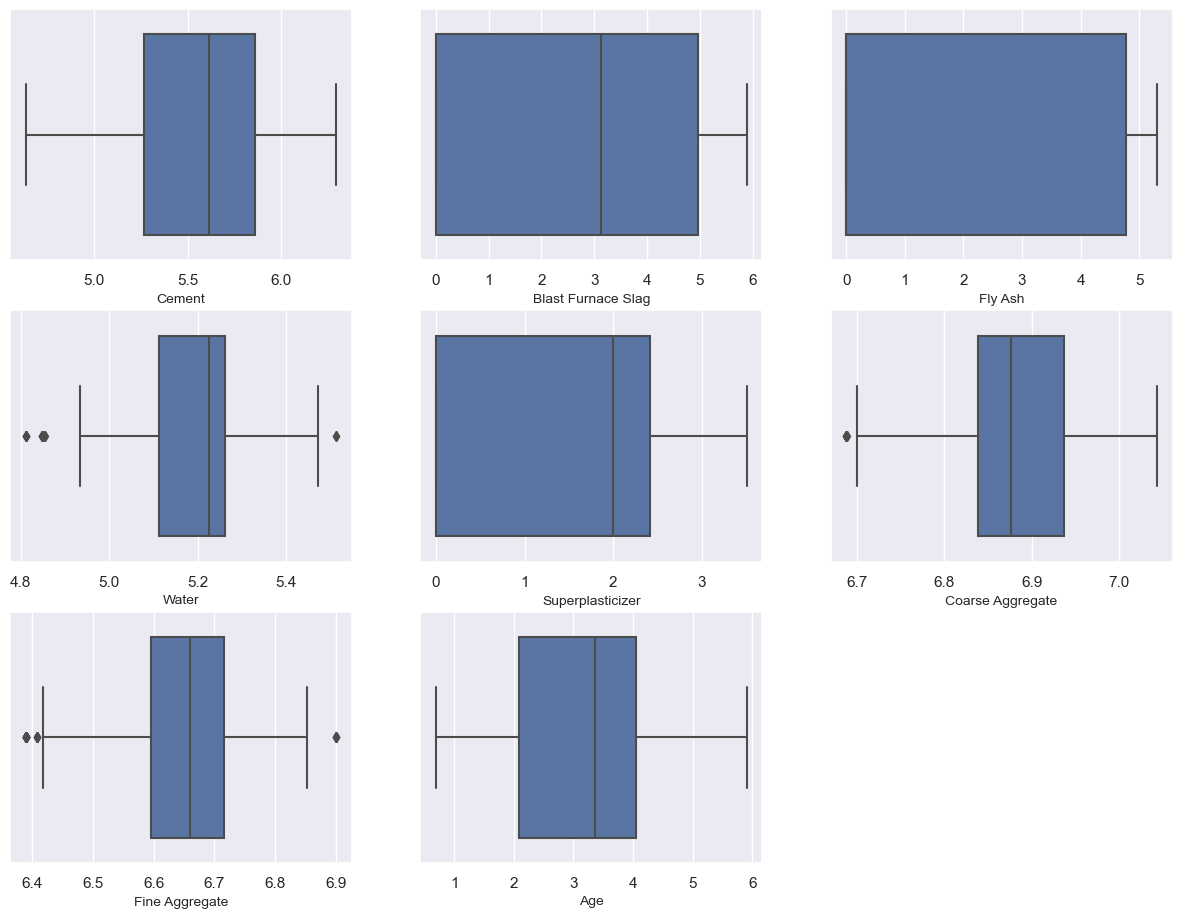

In [16]:
# lets check for outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(X[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


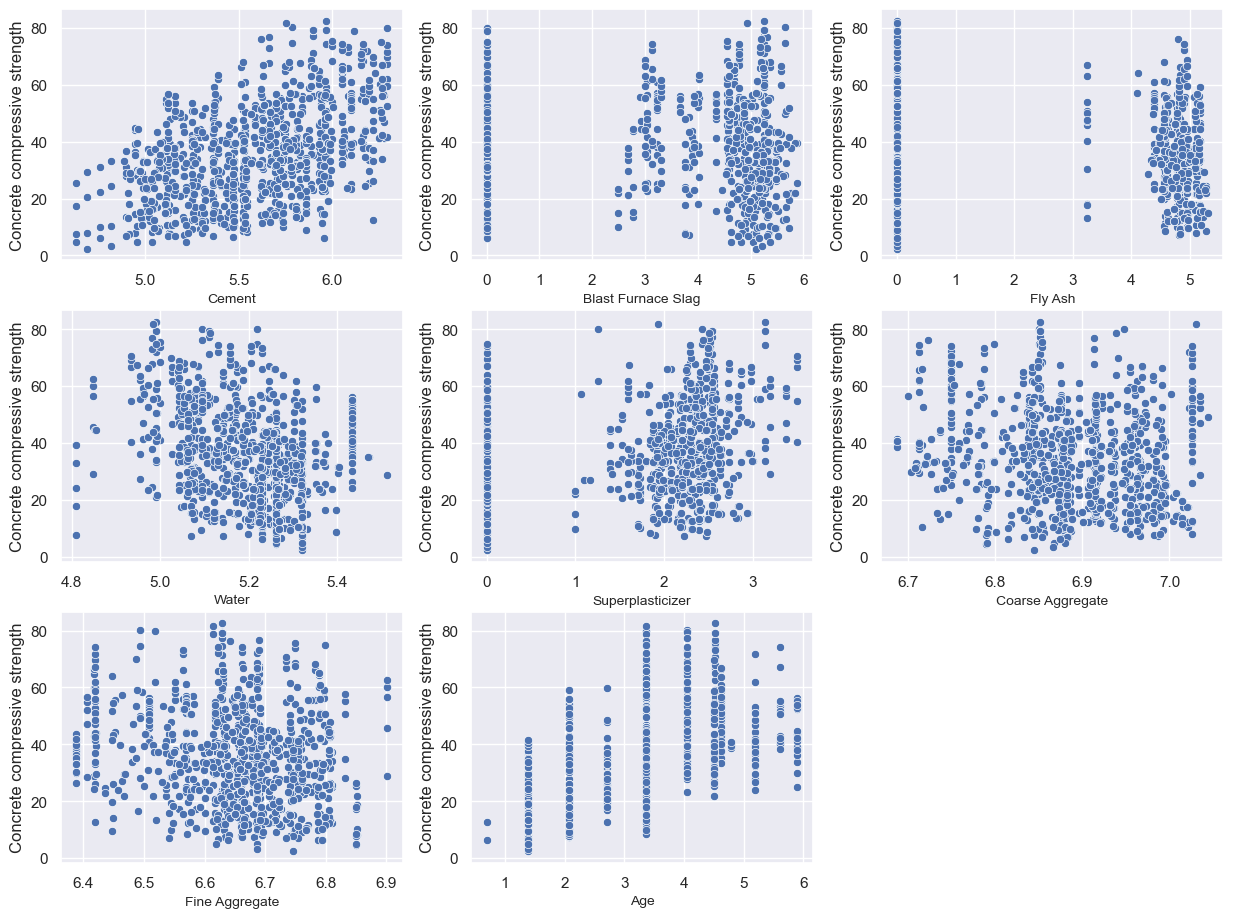

In [17]:
# let's check how our features are related to the target column
plt.figure(figsize=(15,15))
plotnumber = 1
for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=X[column],y=y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data. We will also Random forest regressor and compare our results from both the models.

<AxesSubplot:>

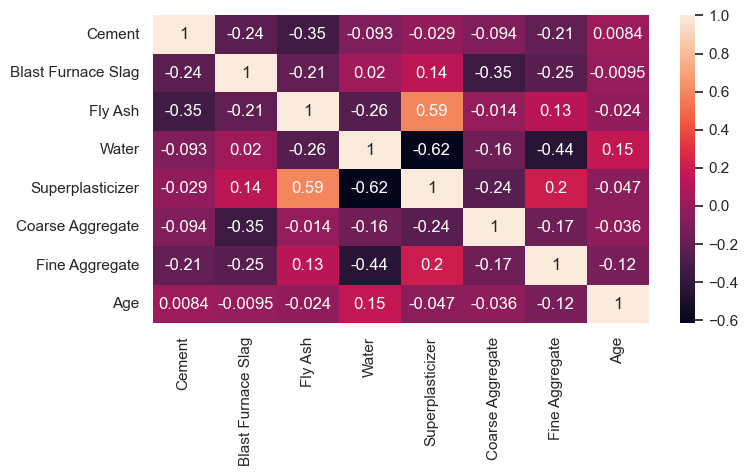

In [18]:
# lets check the correlation using heatmap
plt.figure(figsize=(8,4))
sns.heatmap(X.corr(),annot=True)

from the above heatmap we can conclude that there is no correlation between columns.

# Model Training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
#model selection and training 
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [26]:
linear_model.coef_

array([ 8.9099558 ,  5.17471044, -0.27894202, -3.8543381 ,  3.58457796,
        0.24433036, -0.78128612,  9.74823204])

In [27]:
linear_model.intercept_

36.2931884057971

# calculating the model performance on the test data.

In [28]:
# making predicion on the test data
reg_prediction = linear_model.predict(X_test)
reg_prediction[0:20]

array([53.39271906, 45.18564786, 64.13238197, 39.03542385, 14.89939147,
       44.97490947, 27.8946976 , 50.72882187, 32.43027182, 44.24907739,
       38.06323386, 16.50909374, 51.64680438, 40.55854797, 28.9107383 ,
       25.09416092, 31.98802055, 22.51488701, 40.39437735, 28.84731791])

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = round(mean_squared_error(y_test,reg_prediction),2)
MAE = round(mean_absolute_error(y_test,reg_prediction),2)
RMSE = round(np.sqrt(MSE),2)
r_squared = r2_score(y_test,reg_prediction)
adjusted_r_squared =  1-((1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f'MSE : {MSE}\nMAE : {MAE}\nRMSE : {RMSE}')
print(f'r2_score : {r_squared}')
print(f"adjusted_r2_score : {adjusted_r_squared}")

MSE : 58.53
MAE : 6.03
RMSE : 7.65
r2_score : 0.7903717349131936
adjusted_r2_score : 0.7853051907419113


# validation the assumption of linear regression 

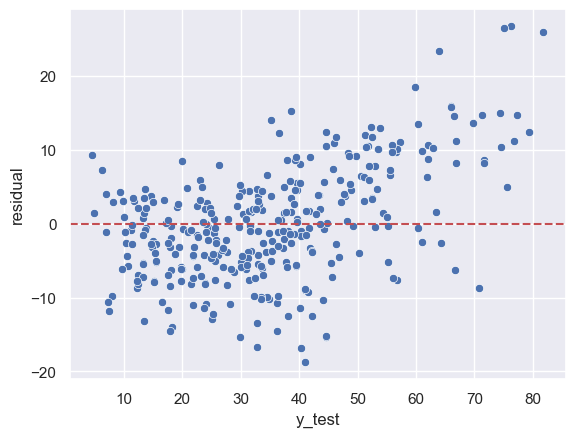

In [30]:
# assumption 1 : residual plot should be random 
residual = y_test-reg_prediction
sns.scatterplot(x=y_test,y=residual)
plt.xlabel('y_test')
plt.ylabel('residual')
plt.axhline(y=0,color='r',ls='--');

<AxesSubplot:xlabel='Concrete compressive strength', ylabel='Density'>

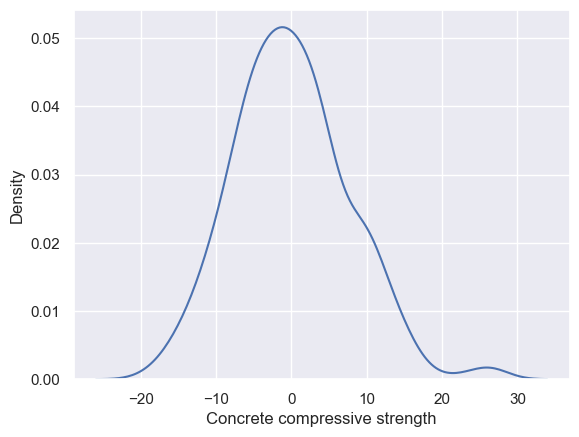

In [31]:
# assumption 2 : residual/error must follow approximately a normal distribution 
sns.kdeplot(residual)

# POLYNOMIAL REGRESSION

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [34]:
poly_features[0]

array([ 6.29341928,  0.        ,  0.        ,  5.0937502 ,  1.25276297,
        6.94793707,  6.51767127,  3.36729583, 39.60712622,  0.        ,
        0.        , 32.05710572,  7.88416262, 43.7262811 , 41.01843804,
       21.19180449,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 25.94629111,
        6.38126162, 35.39105584, 33.19938936, 17.15216381,  1.56941506,
        8.70411827,  8.16509721,  4.21842352, 48.27382951, 45.28436984,
       23.39575952, 42.48003882, 21.9469273 , 11.33868121])

In [35]:
poly_features.shape

(1030, 44)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)

LinearRegression()

In [38]:
poly_model_prediction = poly_model.predict(X_test)
poly_MSE = mean_squared_error(y_test,poly_model_prediction)
poly_MAE = mean_absolute_error(y_test,poly_model_prediction)
poly_RMSE = np.sqrt(poly_MSE)
r_squared = r2_score(y_test,poly_model_prediction)
adjusted_r_squared =  1-((1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f'MSE : {poly_MSE}\nMAE : {poly_MAE}\nRMSE : {poly_RMSE}')
print(f'r2_score : {r_squared}')
print(f"adjusted_r2_score : {adjusted_r_squared}")

MSE : 35.12650458950826
MAE : 4.589456952597611
RMSE : 5.926761728761184
r2_score : 0.8741957458653449
adjusted_r2_score : 0.855431721519837


In [39]:
train_rmse = []
test_rmse = []
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']
for degree in range(1,11):
    polynomial_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    
    train_error = np.sqrt(mean_squared_error(y_train,train_predict))
    test_error = np.sqrt(mean_squared_error(y_test,test_predict))
    
    train_rmse.append(train_error)
    test_rmse.append(test_error)

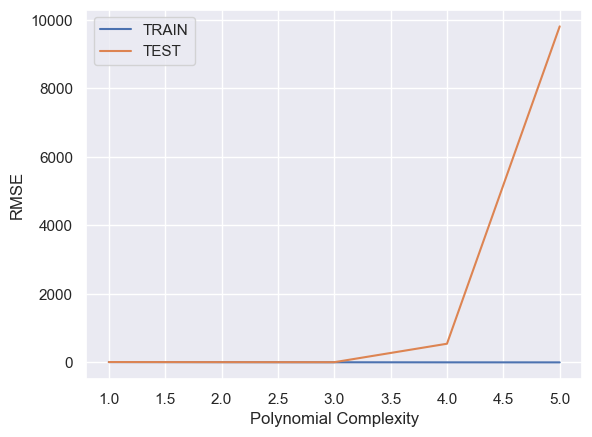

In [40]:
plt.plot(range(1,6),train_rmse[0:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[0:5],label='TEST')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend();


In [41]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']
final_polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
final_polynomial_features = final_polynomial_converter.fit_transform(X)
final_poly_model = LinearRegression()
final_poly_model.fit(final_polynomial_features,y)

LinearRegression()

In [42]:
from joblib import load,dump
dump(final_poly_model,'final_poly_model.joblib') # saving the model
dump(final_polynomial_converter,'final_polynomial_converter.joblib') # saving thr polynomial converter

['final_polynomial_converter.joblib']

In [43]:
loaded_poly_converter = load('final_polynomial_converter.joblib')
loaded_poly_model = load('final_poly_model.joblib')

In [44]:
data = [X.iloc[20].values]
poly_features = loaded_poly_converter.transform(data)
poly_features

array([[4.2750000e+02, 4.7500000e+01, 0.0000000e+00, 2.2800000e+02,
        0.0000000e+00, 9.3200000e+02, 5.9400000e+02, 1.8000000e+02,
        1.8275625e+05, 2.0306250e+04, 0.0000000e+00, 9.7470000e+04,
        0.0000000e+00, 3.9843000e+05, 2.5393500e+05, 7.6950000e+04,
        2.2562500e+03, 0.0000000e+00, 1.0830000e+04, 0.0000000e+00,
        4.4270000e+04, 2.8215000e+04, 8.5500000e+03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.1984000e+04, 0.0000000e+00, 2.1249600e+05,
        1.3543200e+05, 4.1040000e+04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 8.6862400e+05, 5.5360800e+05,
        1.6776000e+05, 3.5283600e+05, 1.0692000e+05, 3.2400000e+04]])

In [45]:
loaded_poly_model.predict(poly_features)

array([54.73818295])

In [46]:
df.iloc[20].loc['Concrete compressive strength']

41.84

# Ridge Regression

In [47]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
cofficient = ridge_model.coef_
print(f"Ridge model cofficient : {cofficient}\n")
intercept = ridge_model.intercept_
print(f"Ridge model intercept : {intercept}\n")
ridge_prediction = ridge_model.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,ridge_prediction)
MAE = mean_absolute_error(y_test,ridge_prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,ridge_prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Ridge model cofficient : [13.27962478  9.94027975  5.47046183 -2.11716734  2.39380174  1.99997478
  2.64924337  6.99737597]

Ridge model intercept : 36.152732316227464

MSE is : 109.56227570270943
MAE is : 8.30228031413368
RMSE is : 10.467199993441868
r-squared value : 0.595075033579116
adjusted_rsquared value : 0.584277034474559


***choosing the best alpha value in Ridge Regression***

In [48]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# defining a range of alpha values
alphas = [0.001,0.01,0.1,1,10,100]

# creating a dataframe of alpha values and Mean of mean absolute error
result = pd.DataFrame(columns=['Alpha','Mean MAE'])

# performing k-fold cross validation for each alpha
k = 5 # we can choose the umber of folds(e.g, 5-fold cross-validation)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge,X_train,y_train,scoring='neg_mean_absolute_error',cv=k)
    mean_mae = round(-np.mean(scores),3)
    result = result.append({'Alpha':alpha,'Mean MAE':mean_mae},ignore_index=True)

# finding the alpha with the lowest mean MAE
best_alpha = result.loc[result['Mean MAE'].idxmin()]['Alpha']
print('Best Alpha:',best_alpha,'\n')

# retraining the ridge model with best best alpha value
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train,y_train)
cofficient = ridge_model.coef_
print(f"Ridge model cofficient : {cofficient}")
intercept = ridge_model.intercept_
print(f"Ridge model intercept : {intercept}\n")
ridge_prediction = ridge_model.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,ridge_prediction)
MAE = mean_absolute_error(y_test,ridge_prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,ridge_prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")



Best Alpha: 0.001 

Ridge model cofficient : [13.58559591 10.23717825  5.73031371 -1.91540127  2.39567851  2.20513878
  2.91232736  7.01970682]
Ridge model intercept : 36.152732316227464

MSE is : 109.7505961079588
MAE is : 8.298582930625614
RMSE is : 10.476191870520452
r-squared value : 0.5943790309332884
adjusted_rsquared value : 0.583562471758176


# Lasso Regression 

In [49]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# finding out the best alpha value for Lasso Regression and training the model with the best alpha value.

# defining a range of alpha values
alphas = [1,2,3,4,5,6,7,8,9,10]

# creating a dataframe of alpha values and Mean of mean absolute error
result = pd.DataFrame(columns=['Alpha','Mean MAE'])

# performing k-fold cross validation for each alpha
k = 5 # we can choose the umber of folds(e.g, 5-fold cross-validation)

for alpha in alphas:
    ridge = Lasso(alpha=alpha)
    scores = cross_val_score(ridge,X_train,y_train,scoring='neg_mean_absolute_error',cv=k)
    mean_mae = round(-np.mean(scores),3)
    result = result.append({'Alpha':alpha,'Mean MAE':mean_mae},ignore_index=True)

# finding the alpha with the lowest mean MAE
best_alpha = result.loc[result['Mean MAE'].idxmin()]['Alpha']
print('Best Alpha:',best_alpha,'\n')

# retraining the ridge model with best best alpha value
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha=best_alpha)
Lasso_model.fit(X_train,y_train)
cofficient = Lasso_model.coef_
print(f"Lasso model cofficient : {cofficient}")
intercept = ridge_model.intercept_
print(f"Lasso model intercept : {intercept}\n")
Lasso_prediction = Lasso_model.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,Lasso_prediction)
MAE = mean_absolute_error(y_test,Lasso_prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,Lasso_prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Best Alpha: 1.0 

Lasso model cofficient : [ 7.56411579  4.14215901  0.         -2.75467602  3.54833119 -0.
 -0.          5.38807755]
Lasso model intercept : 36.152732316227464

MSE is : 124.93735293091298
MAE is : 9.14405095539254
RMSE is : 11.177537874277723
r-squared value : 0.5382511624937614
adjusted_rsquared value : 0.5259378601602618


# Elastic Net

In [50]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)
print(f'Best l1_ratio: {elastic_model.l1_ratio_}')
elastic_model_prediction = elastic_model.predict(X_test)
MSE = mean_squared_error(y_test,elastic_model_prediction)
MAE = mean_absolute_error(y_test,elastic_model_prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,elastic_model_prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Best l1_ratio: 0.7
MSE is : 109.2226024230909
MAE is : 8.310347759697814
RMSE is : 10.450961794164732
r-squared value : 0.5963304126816531
adjusted_rsquared value : 0.5855658903531638


In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define a range of alpha and lambda values to test
alphas = [0.001,0.01,0.1,1]
l1_ratios = [0.1,0.5,0.7,0.9]

# creating a Elastic Net Model
elastic_model = ElasticNet()

# performing cross-validated grid search to find the best alpha and l1_ratio
param_grid = {'alpha':alphas,'l1_ratio':l1_ratios}
grid_search = GridSearchCV(estimator=elastic_model,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_test,y_test)

# Get the best alpha and l1_ratio values
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print('Best Alpha:',best_alpha)
print('Best L1 Ratio:',best_l1_ratio)


# retraining the elastic net model with best best alpha value

elastic_model = ElasticNet(alpha=best_alpha,l1_ratio=best_l1_ratio)
elastic_model.fit(X_train,y_train)
cofficient = elastic_model.coef_
print(f"Elastic model cofficient : {cofficient}")
intercept = elastic_model.intercept_
print(f"Elastic model intercept : {intercept}\n")
elastic_prediction = elastic_model.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(y_test,elastic_prediction)
MAE = mean_absolute_error(y_test,elastic_prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,elastic_prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Best Alpha: 0.01
Best L1 Ratio: 0.9
Elastic model cofficient : [13.12539175  9.78554831  5.33790817 -2.22786158  2.37880213  1.880279
  2.50453224  6.98236116]
Elastic model intercept : 36.152732316227464

MSE is : 109.45522088634576
MAE is : 8.30314890139333
RMSE is : 10.462084920623889
r-squared value : 0.5954706913695662
adjusted_rsquared value : 0.5846832431394213


# DECISION TREE REGRESSION

In [52]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
 'max_depth': range(2,10,1),
 'min_samples_split':range(2,10,1),
 'min_samples_leaf':range(1,10,1),
 'splitter':['best','random']
}

regressor = DecisionTreeRegressor(random_state=101)
grid_model = GridSearchCV(estimator=regressor,param_grid=param_grid,cv=5)
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)
prediction = grid_model.predict(X_test)


MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
MSE is : 48.60295105653299
MAE is : 5.154167231725484
RMSE is : 6.971581675382781
r-squared value : 0.82037112502186
adjusted_rsquared value : 0.8155810216891096


# RANDOM FOREST REGRESSION

In [53]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [200,210,220,250],  
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],  
    'oob_score': [True]
}


model = RandomForestRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_model.fit(X_train,y_train)
print(f'Best Hyperparameter Value:{grid_model.best_params_}')
prediction = grid_model.predict(X_test)

MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Best Hyperparameter Value:{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 220, 'oob_score': True}
MSE is : 30.310568605542457
MAE is : 3.7512143776530955
RMSE is : 5.50550348338301
r-squared value : 0.8879768981058718
adjusted_rsquared value : 0.884989615388695


# ADABOOST REGRESSOR

In [58]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    'base_estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=3)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'random_state': [42,101]
}

model = AdaBoostRegressor()
grid_model = GridSearchCV(estimator=AdaBoostRegressor,param_grid=param_grid,cv=5)
grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_model.fit(X_train,y_train)
print(f'Best Hyperparameter Value:{grid_model.best_params_}')
prediction = grid_model.predict(X_test)

MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

Best Hyperparameter Value:{'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 42}
MSE is : 60.317522558054705
MAE is : 6.488999423227818
RMSE is : 7.766435640501678
r-squared value : 0.7659180008859536
adjusted_rsquared value : 0.7564121329016269


# GRADIENTBOOST REGRESSION

In [65]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9], 
    
}
model = GradientBoostingRegressor()
grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_model.fit(X_train,y_train)
print(f'Best Hyperparameter Value:{grid_model.best_params_}')
prediction = grid_model.predict(X_test)

MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")


Best Hyperparameter Value:{'learning_rate': 0.1, 'n_estimators': 300, 'subsample': 0.9}
MSE is : 19.947582140553518
MAE is : 3.0760575853531127
RMSE is : 4.466271615178987
r-squared value : 0.9225868419834681
adjusted_rsquared value : 0.9194431604396496


# XGBOOST REGRESSION

In [59]:
!pip install xgboost

     -------------------------------------- 99.7/99.7 MB 578.3 kB/s eta 0:00:00


In [64]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from xgboost import XGBRegressor

model = XGBRegressor(n_etimators=100,learning_rate=0.3)
model.fit(X_train,y_train)
prediction = grid_model.predict(X_test)

MSE = mean_squared_error(y_test,prediction)
MAE = mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MSE)
score = r2_score(y_test,prediction)
adjusted_rsquared = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is : {MSE}")
print(f"MAE is : {MAE}")
print(f"RMSE is : {RMSE}")
print(f"r-squared value : {score}")
print(f"adjusted_rsquared value : {adjusted_rsquared}")

MSE is : 60.317522558054705
MAE is : 6.488999423227818
RMSE is : 7.766435640501678
r-squared value : 0.7659180008859536
adjusted_rsquared value : 0.7564121329016269
